In [17]:
from non_linearity.environment import Particle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
omega = 2*np.pi*1e5
T = 2*np.pi/omega
t = np.arange(0, 1000*T, T/400)
N = t.shape[0]
delta_t = np.diff(t)[0]

In [19]:
gamma = 85000
coupling = 1
eta_detec=0.9
env = Particle(omega, gamma, coupling, eta_detection=eta_detec)

In [20]:
std_detection = 1

In [21]:
states = np.array([[1],[0.]])
new_states = np.zeros((N,2)) 
measured_states = np.zeros((N, 2))
for i in tqdm(range(t.shape[0])):
    new_states[i,:] = states[:,0]
    measured_states[i, :] = states[:, 0] + std_detection*np.random.normal()
    states = env.step(states, control=0, delta_t=delta_t)

100%|██████████| 400000/400000 [00:10<00:00, 39308.40it/s]


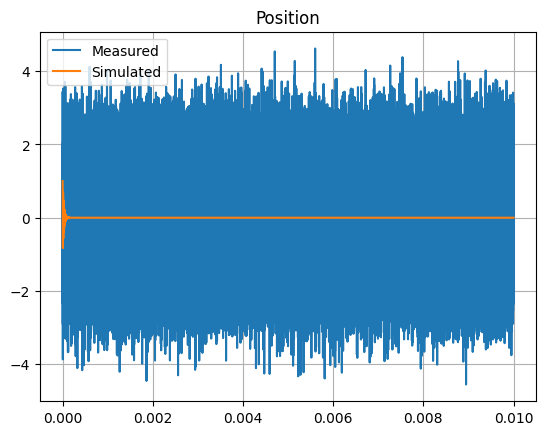

In [22]:
fig = plt.Figure()
plt.title('Position')
plt.plot(t, measured_states[:,0])
plt.plot(t, new_states[:,0])
plt.grid()
plt.legend(['Measured', 'Simulated'])
plt.show()

In [23]:
radius = 75e-3                     # particle radius         micrometers
presure = 1e-3                     # gas pressure            kg/(micrometer*second^2)
m_gas = 2.325e-26                  # nitrogen gas molecule   kg
T = 300.0                            # temperature             Kelvin
kb = 1.38064852e-11                # Boltzmann cst.          picoJoule/Kelvin
v_gas = np.sqrt(3*kb*T/m_gas)      # meam squared velocity of nitrogen gas        micrometers/seconds
gamma = 15.8*radius**2*presure/(v_gas)
rho = 2200*1e-18                   # silica density          kilogram/(micrometers)^3
massa = rho*4*np.pi*radius**3/3    # mass                    kg
n_m = 1.01                         # medium refractive index
n_p = 1.46                         # particle refractive 
m = (n_p/n_m)                      # relative refractive  
NA = 0.7                           # numerical aperture
c = 3e14                           # speed of light          micrometers/seconds
P = 50e9                           # power                   kilogram*micrometers^2/seconds^3
wl0 = 0.78                         # laser wavelength        micrometers
wl_m = wl0/n_m                     # wavelength              micrometers
w0 = wl_m/(np.pi*NA)               # beam waist              micrometers
zr = np.pi*w0**2/wl_m              # railegh range           micrometers
I0 = 2*P/(np.pi*w0**2)             # intensity               Watts/meter^2
V0 = -(2*np.pi*n_m*radius**3/c)*((m**2-1)/(m**2+2))*I0 

In [26]:
gamma/massa

31270.382349606927